<h1> 1.Časť - prieskumná analýza </h1>

V tejto analýze budeme pracovať s dvoma datasetmi personal kde budu osobné informácie a other, ktorý obshuje namerané hodnty pacientov z cukrovkou a bez nej táto informácia sa nachádza v stplci class.

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [59]:
dataP = pd.read_csv("personal_train.csv", index_col=0)
dataP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


V datasete personal máme 5 atributov ako môzeme vidieť po príkaze info. Z toho jeden čiselný a 4 kategorické.

In [60]:
dataO = pd.read_csv("other_train.csv", index_col=0) #, na_values =["??"]
dataO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 21 columns):
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3709 non-null object
occupation          3974 non-null object
pregnant            3967 non-null object
education-num       3964 non-null float64
skewness_glucose    3970 non-null float64
mean_glucose        3573 non-null float64
std_oxygen          3967 non-null float64
capital-gain        3970 non-null float64
skewness_oxygen     3969 non-null float64
kurtosis_glucose    3965 non-null float64
personal_info       3968 non-null object
fnlwgt              3974 non-null float64
class               3972 non-null float64
std_glucose         3964 non-null float64
income              3967 non-null object
mean_oxygen         3971 non-null float64
hours-per-week      3969 non-null float64
capital-loss        3971 non-null float64
workclass           3961 non-null object
dtypes: float64(13)

V datasete other máme 21 atributov. Z toho 14 čiselných a 7 kategorických.
V tomto datasete sa už nachádzajú aj nulové hodnoty, keďže počet hodnôt v jednotlivých atribútoch sa líši. Spustením príkazu v nasledujúcej bunke zistíme koľko udajov obsahuje nulové hodnoty.
Tiež sme si všimli, že sa tu nachádza o 50 údajov viac v rovnakých atributoch ako v prvom datasete.

In [61]:
dataO.shape[0] - dataO.dropna().shape[0]

704

In [62]:
dataP.head() 

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",36,Female,1983-01-16
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",4800,Female,71-09-03
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",6200,Male,1957-10-02
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",1700,Male,2002-02-27
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",35,Male,1984-03-23


Z ukážky dát sme zistili, že niektoré hodnoty veku sú sabotáž ale keďže máme aj dátum tak budeme vedieť podozrivé hodnoty bez podozrivého dátumu doplniť. 

In [63]:
dataO.head()

,name,address,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,kurtosis_glucose,personal_info,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,workclass
0,Daniel Love,"126 Ramirez Roads\r\nNew Jayville, IL 18861",10.58036423,Sales,f,9.0,3.158830,85.859375,14.121127,0.0,...,0.837686,White|United-States\r\r\nHS-grad -- Married-ci...,277647.0,0.0,35.062608,>50K,1.857860,40.0,1902.0,Private
1,Roy Paradis,"01168 Stark Pine Apt. 583\r\nDavidville, IN 32044",3.713364594,Craft-repair,f,9.0,1.234184,91.679688,36.946291,0.0,...,0.563703,White|United-States\r\r\nHS-grad -- Married-ci...,170721.0,0.0,39.714004,<=50K,10.001672,40.0,2002.0,Self-emp-not-inc
2,Charles Chen,"09482 Horne Lakes Apt. 373\r\nEast Brian, TN 2...",6.478064004,Handlers-cleaners,f,9.0,1.872355,89.960938,22.646980,0.0,...,0.690419,White|United-States\r\r\nHS-grad -- Married-ci...,177951.0,0.0,38.576305,<=50K,4.134615,48.0,0.0,Private
3,Chester Holmes,"720 Harris Turnpike Suite 732\r\nEast Sierra, ...",??,Sales,f,10.0,0.395583,NaN,14.001759,0.0,...,0.385219,White|United-States\r\r\nSome-college -- Marri...,33975.0,0.0,45.316034,>50K,1.849498,40.0,0.0,Private
4,James Ayala,Unit 3230 Box 9523\r\nDPO AA 55810,NaN,Transport-moving,f,9.0,0.493384,94.593750,29.361953,0.0,...,0.332062,Amer-Indian-Eskimo|United-States\r\r\nHS-grad ...,112627.0,0.0,47.992421,<=50K,5.739130,40.0,0.0,Private


Po vypísaní ukážky dát sme si všimli, že stĺpce education-num a class sú kategorické aj keď sú číselné. Preto zmeníme ich typ z float64 na object.
Všimli sme si tiež, že pri atribúte personal_info sa nachádzajú až tri údaje - rasa, národnosť, vzdelanie a rodinný stav. Tieto informácie budeme musieť rozdeliž pre ich podrobnejšiu analýzu.

In [64]:
temp = dataO['personal_info'].str.split("\r\r\n|--|\\|", expand = True)
dataO['ethn'] = temp[0]
dataO['state'] = temp[1]
dataO['edu'] = temp[2]
dataO['status'] = temp[3]
dataO['fam_memb'] = temp[4] 
dataO.drop(['personal_info'], axis = 1)
dataO.head()

,name,address,kurtosis_oxygen,occupation,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,income,mean_oxygen,hours-per-week,capital-loss,workclass,ethn,state,edu,status,fam_memb
0,Daniel Love,"126 Ramirez Roads\r\nNew Jayville, IL 18861",10.58036423,Sales,f,9.0,3.158830,85.859375,14.121127,0.0,...,>50K,1.857860,40.0,1902.0,Private,White,United-States,HS-grad,Married-civ-spouse,Husband
1,Roy Paradis,"01168 Stark Pine Apt. 583\r\nDavidville, IN 32044",3.713364594,Craft-repair,f,9.0,1.234184,91.679688,36.946291,0.0,...,<=50K,10.001672,40.0,2002.0,Self-emp-not-inc,White,United-States,HS-grad,Married-civ-spouse,Husband
2,Charles Chen,"09482 Horne Lakes Apt. 373\r\nEast Brian, TN 2...",6.478064004,Handlers-cleaners,f,9.0,1.872355,89.960938,22.646980,0.0,...,<=50K,4.134615,48.0,0.0,Private,White,United-States,HS-grad,Married-civ-spouse,Husband
3,Chester Holmes,"720 Harris Turnpike Suite 732\r\nEast Sierra, ...",??,Sales,f,10.0,0.395583,NaN,14.001759,0.0,...,>50K,1.849498,40.0,0.0,Private,White,United-States,Some-college,Married-civ-spouse,Husband
4,James Ayala,Unit 3230 Box 9523\r\nDPO AA 55810,NaN,Transport-moving,f,9.0,0.493384,94.593750,29.361953,0.0,...,<=50K,5.739130,40.0,0.0,Private,Amer-Indian-Eskimo,United-States,HS-grad,Married-civ-spouse,Husband


Ako sme skôr opisovali, rozhodli sme sa rozdeliť atribút personal_info na päť podatribútov.

In [65]:
dataO = dataO.astype({'class':str,"education-num":str})

In [66]:
dataP.describe()

,age
count,3933.000000
mean,60.317315
std,1695.419696
min,-8100.000000
25%,43.000000
50%,52.000000
75%,60.000000
max,8200.000000


In [67]:
dataP.describe(exclude=np.number)

,name,address,sex,date_of_birth
count,3933,3933,3933,3933
unique,3933,3933,2,3726
top,Daniel Happenny,"73821 Alicia Greens\r\nJeremyville, DC 03925",Male,1965-03-29
freq,1,1,2659,4


Describe nám ukázal len to čo už vieme, že z atribútu vek bude potrebne odstraniť prípadne neskôr doplniť podľa dátumu hodnoty, ktoré sú záporné a taktiež tie, ktoré sú väčšie ako sto keďže je nepravdepodobné, že bude niekto starší. Všetky ostatné hodnoty vyzerajú bzť v poriadku. Až na dátum, ktorý je niekedý zapísaný v inom formáte, čo bude tiež neskôr potrebné upraviť na jednotný formát.

In [68]:
dataO.describe()

,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3970.000000,3573.000000,3967.000000,3970.000000,3969.000000,3965.000000,3.974000e+03,3964.000000,3971.000000,3969.000000,3971.000000
mean,4.226161,101.255573,31.196752,1198.260202,91.430643,0.952926,1.887942e+05,45.153289,18.512612,40.614764,82.986653
std,9.685920,33.484945,22.290120,8087.643634,108.634949,1.614420,1.009518e+05,7.606785,34.823343,12.386216,391.498429
min,-1.755332,6.265625,7.370432,0.000000,-1.976976,-1.641515,1.921400e+04,25.695250,0.213211,1.000000,0.000000
25%,-0.119296,87.742188,15.056887,0.000000,12.869062,0.071569,1.185055e+05,40.148108,2.064381,40.000000,0.000000
50%,0.376026,110.539062,20.593696,0.000000,68.617240,0.311400,1.805760e+05,45.866933,3.237458,40.000000,0.000000
75%,2.092365,124.125000,43.413967,0.000000,127.032590,0.778607,2.357122e+05,50.337619,12.695234,45.000000,0.000000
max,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,1.038553e+06,91.206475,217.371238,99.000000,3770.000000


Decribe pre druhý dataset nám ukúzal, že niektoré namerané hodnoty môžu byť chybné nakoľko sú priveľké skoky medzi priemernými hodnotami a maximami/minimami, napr.: skewness_glucose (priemer 4.226, medián 0.376 a maximálna hodnota 68.1), capital-gain (priemer 1198.26, medián 0, max 99999), to isté skewness_oxygen, kurtosis_glucose, mean_oxygen a capital loss. Budeme musieť preto stanoviť nejaký rozsah, od ktorého budeme brať namerané hodnoty ako korektné a tie, ktoré budú mimo vylúčime ako outlierov.
Ďalej sme si všimli, že pri atribúte hours-per-week sú niektoré velmi zvláštne hodnoty, ako napríklad 1 alebo 99 hodín odpracovaných týždenne, preto budeme tiež musieť stanovič nejaký rozsah.

In [69]:
dataO.describe(exclude=np.number)

,name,address,kurtosis_oxygen,occupation,pregnant,education-num,personal_info,class,income,workclass,ethn,state,edu,status,fam_memb
count,3983,3983,3709,3974,3967,3983,3968,3983,3967,3961,3968,3968,3968,3968,3968
unique,3933,3933,3540,27,6,17,658,3,2,8,5,40,16,7,6
top,Virgil Selman,"9086 Becker Streets\r\nNew Michaelbury, MA 54353",??,Sales,f,9.0,White|United-States\r\r\nHS-grad -- Married-ci...,0.0,<=50K,Private,White,United-States,HS-grad,Married-civ-spouse,Husband
freq,2,2,139,479,3507,1252,454,2958,2985,2724,3378,3543,1253,1828,1628


In [70]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 26 columns):
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3709 non-null object
occupation          3974 non-null object
pregnant            3967 non-null object
education-num       3983 non-null object
skewness_glucose    3970 non-null float64
mean_glucose        3573 non-null float64
std_oxygen          3967 non-null float64
capital-gain        3970 non-null float64
skewness_oxygen     3969 non-null float64
kurtosis_glucose    3965 non-null float64
personal_info       3968 non-null object
fnlwgt              3974 non-null float64
class               3983 non-null object
std_glucose         3964 non-null float64
income              3967 non-null object
mean_oxygen         3971 non-null float64
hours-per-week      3969 non-null float64
capital-loss        3971 non-null float64
workclass           3961 non-null object
ethn                3

In [71]:
dataO.median()
#dat prec kategorické

skewness_glucose         0.376026
mean_glucose           110.539062
std_oxygen              20.593696
capital-gain             0.000000
skewness_oxygen         68.617240
kurtosis_glucose         0.311400
fnlwgt              180576.000000
std_glucose             45.866933
mean_oxygen              3.237458
hours-per-week          40.000000
capital-loss             0.000000
dtype: float64

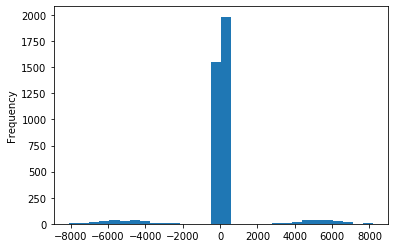

In [74]:
dataP.age.plot.hist(bins=30)

In [85]:
dataRelAge = dataP[(dataP['age']>0) & (dataP['age'] < 100)]
dataIrelAge = dataP[(dataP['age']<0) | (dataP['age'] > 100)]

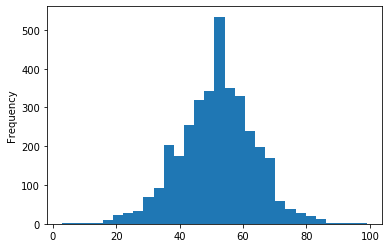

In [87]:
dataRelAge.age.plot.hist(bins=30)

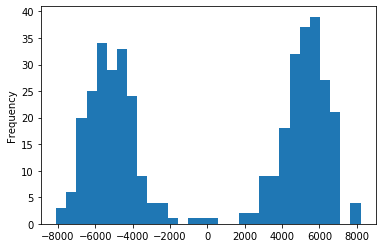

In [88]:
dataIrelAge.age.plot.hist(bins = 30)

Pre porovnanie vekov sme sa pre vizuálne zobrazenie rozhodli využiť histogram pretože box plot bol veľmi neprehladný. Ako môžeme vidieť aj outlieri majú +- normálne rozdelenie čo môže znamenať, že sa jednalo o skutočné dáta. Aj keď to mohol byť tento prípad, nevieme akým spôsobom boli upravené, preto ich aj tak vylúčime.

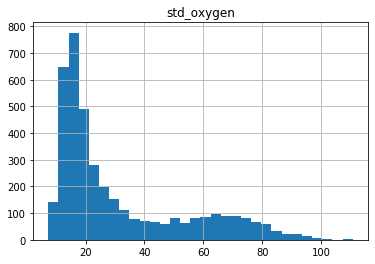

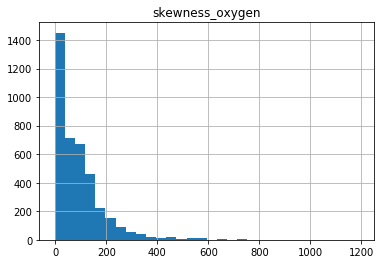

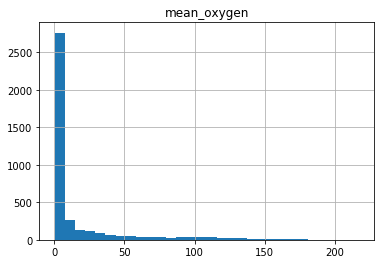

In [99]:
#co vsetko histogramovat z tychto dat? treba to nejako upravovat??
dataO.hist(column = ['std_oxygen'], bins=30)
dataO.hist(column = ['skewness_oxygen'], bins=30)
dataO.hist(column = ['mean_oxygen'], bins=30)
plt.show()

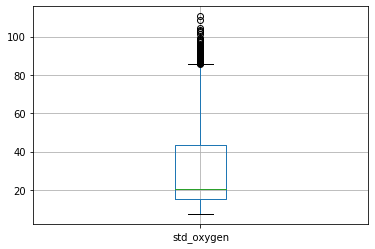

In [105]:
boxplot = dataO.boxplot(column=['std_oxygen'])

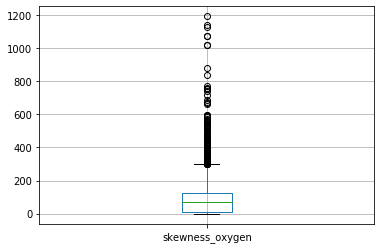

In [106]:
boxplot = dataO.boxplot(column=['skewness_oxygen'])

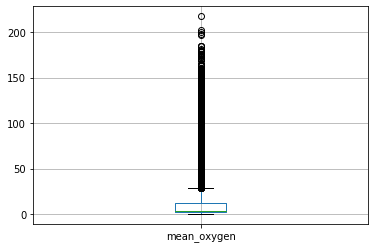

In [107]:
boxplot = dataO.boxplot(column=['mean_oxygen'])

Tu sme si vykreslili grafy ku kyslíkovým meraniam. Zistili sme, že všetky majú gama rozdelenie. Pre porovnanie sme vykreslili aj box-ploty, v ktorých si vieme pozrieť outlierov. VZhladom na toto rozdelenie nevieme určite, ktorý z outlierov by sa mali vylúčiť. V neskoršej fáze bude možné upraviť gama na normálne rozdelenie a byť si istejší ohraničením.

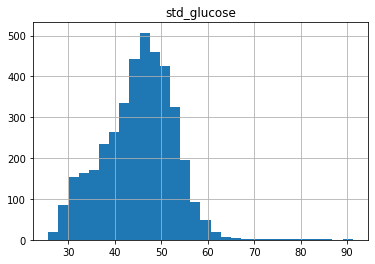

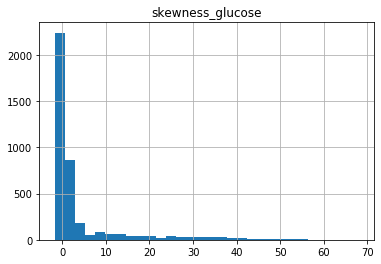

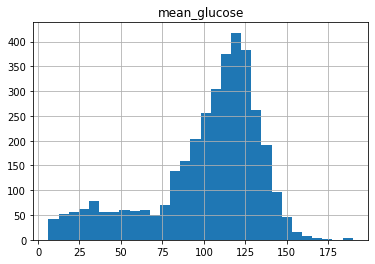

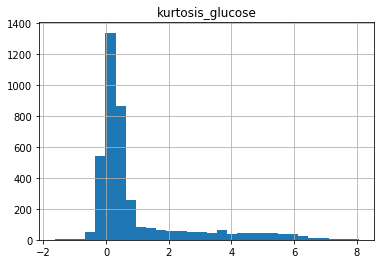

In [109]:
dataO.hist(column = ['std_glucose'], bins=30)
dataO.hist(column = ['skewness_glucose'], bins=30)
dataO.hist(column = ['mean_glucose'], bins=30)
dataO.hist(column = ['kurtosis_glucose'], bins=30)
plt.show()

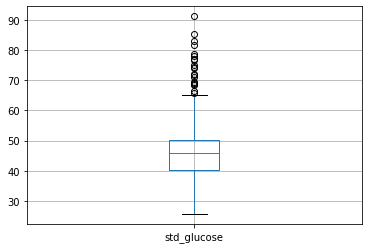

In [110]:
dataO.boxplot(column = ['std_glucose'])

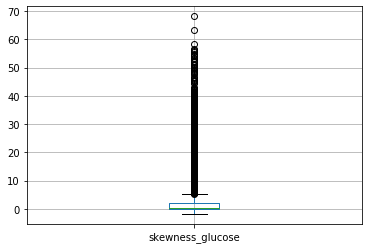

In [111]:
dataO.boxplot(column = ['skewness_glucose'])

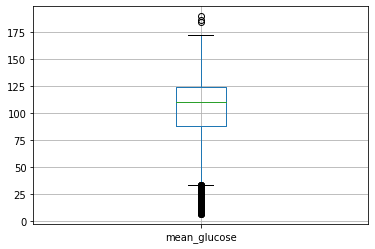

In [112]:
dataO.boxplot(column = ['mean_glucose'])

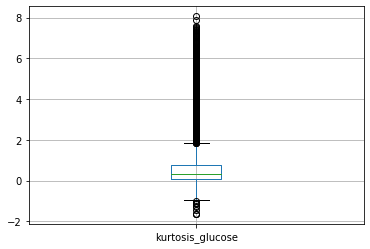

In [113]:
dataO.boxplot(column = ['kurtosis_glucose'])

Rovnako ako pri kyslíku sme sa rozhodli v neskoršej fáze upraviť rozdelenia na normálne pre lepšie oddelenie dát, ktoré budeme chcieť použiť od dát, ktoré nie.
Chceli sme spraviť aj histogramové + plotboxové porovnanie pre capital-loss, capital-gain a fnlwgt pretože vyzerali, že by spolu mohli súvisieť. Neboli sme si však istý či spolu súvisia kedže sa v niektorých prípadoch objavovali hodnoty aj v loss a zároveň v gain, preto sme sa rozhodli zatial to nechať tak.

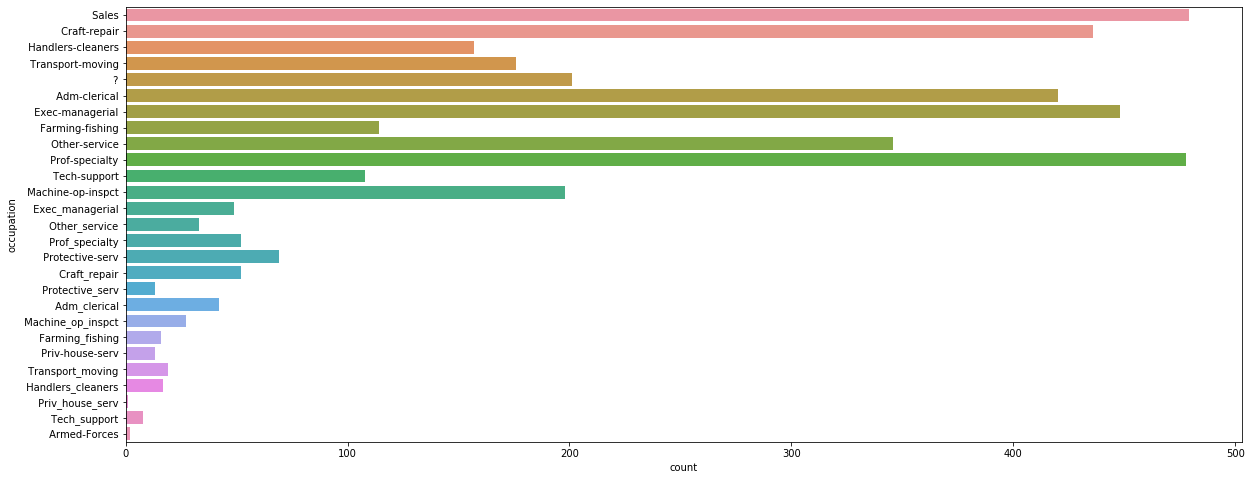

In [143]:
#STATISTIKA - KATEGORICKE ATRIBUTY
#doplnanie dat? vysoke veky ale je datum narodenia doplnit z toho???????????
# pokial chceme spravit napr class - ma to problem s tým ze je to cislo, ako to obísť??
plt.figure(figsize = (20,8))
sns.countplot(y = 'occupation', data = dataO)
plt.show()

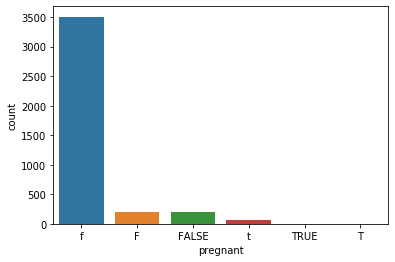

In [138]:
sns.countplot(x = 'pregnant', data = dataO)

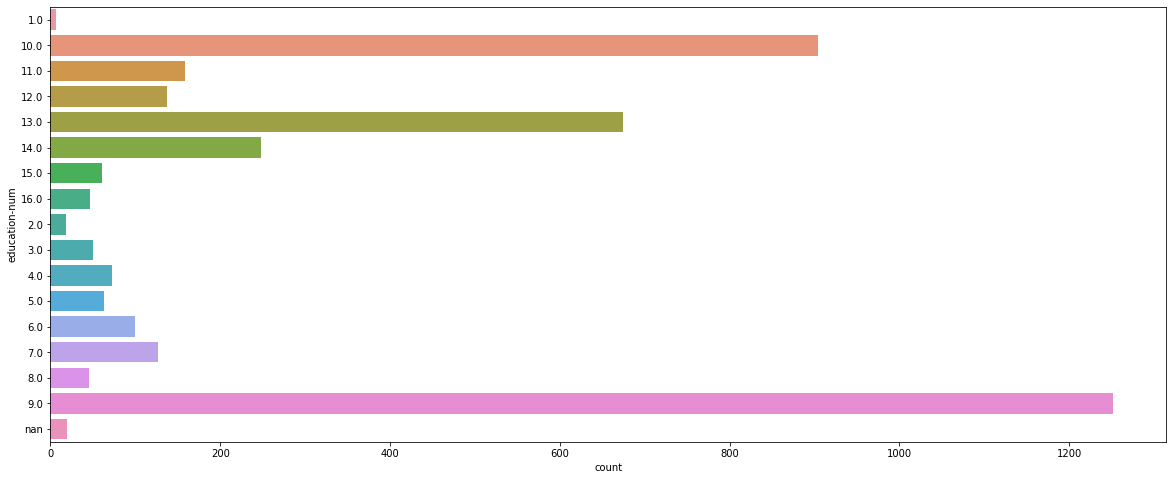

In [142]:
plt.figure(figsize = (20,8))
sns.countplot(y = 'education-num', data = dataO)
plt.show()

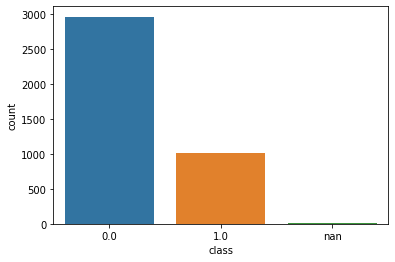

In [124]:
sns.countplot(x = 'class', data = dataO)

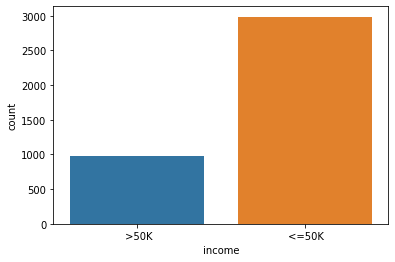

In [125]:
sns.countplot(x = 'income', data = dataO)

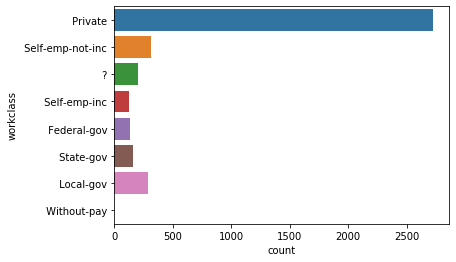

In [144]:
sns.countplot(y = 'workclass', data = dataO)

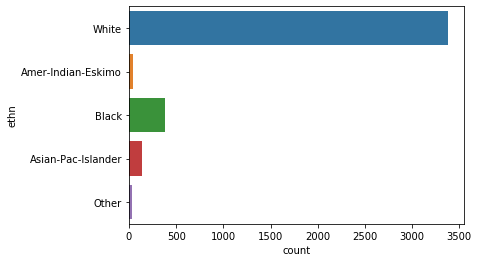

In [145]:
sns.countplot(y = 'ethn', data = dataO)

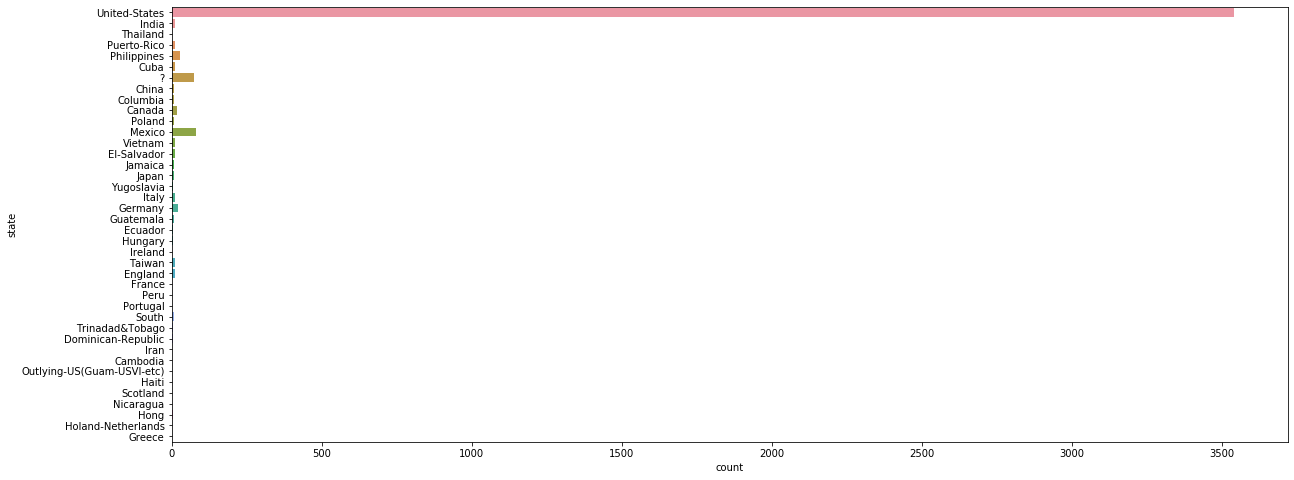

In [147]:
plt.figure(figsize = (20,8))
sns.countplot(y = 'state', data = dataO)
plt.show()

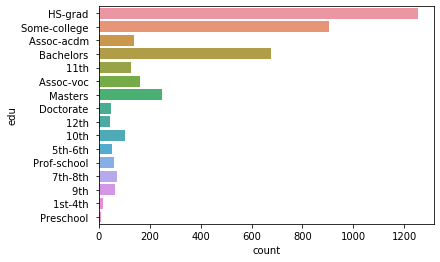

In [148]:
sns.countplot(y = 'edu', data = dataO)

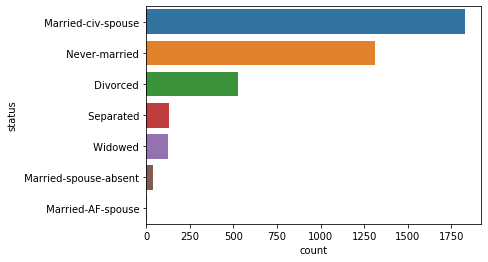

In [149]:
sns.countplot(y = 'status', data = dataO)

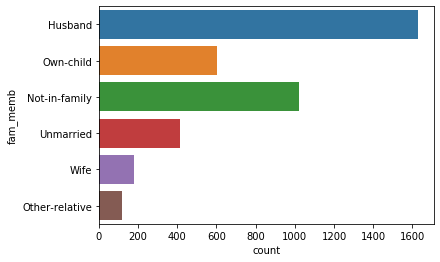

In [150]:
sns.countplot(y = 'fam_memb', data = dataO)

Z histogramov pre kategorické atribúty sme si všimli, že sa v dátach nachádzaju dva typy pre nevyplnenu hodnotu  - ? a nan, ktoré bude treba zmeniť na jednotnú hodnotu.
Ďalej bude treba upraviť dáta s rovnakým významom ale rozdielným zápisom v atribúte pregnant kde sa nachádza viacero tvarov false a true.

<h1>Párová analýza</h1>

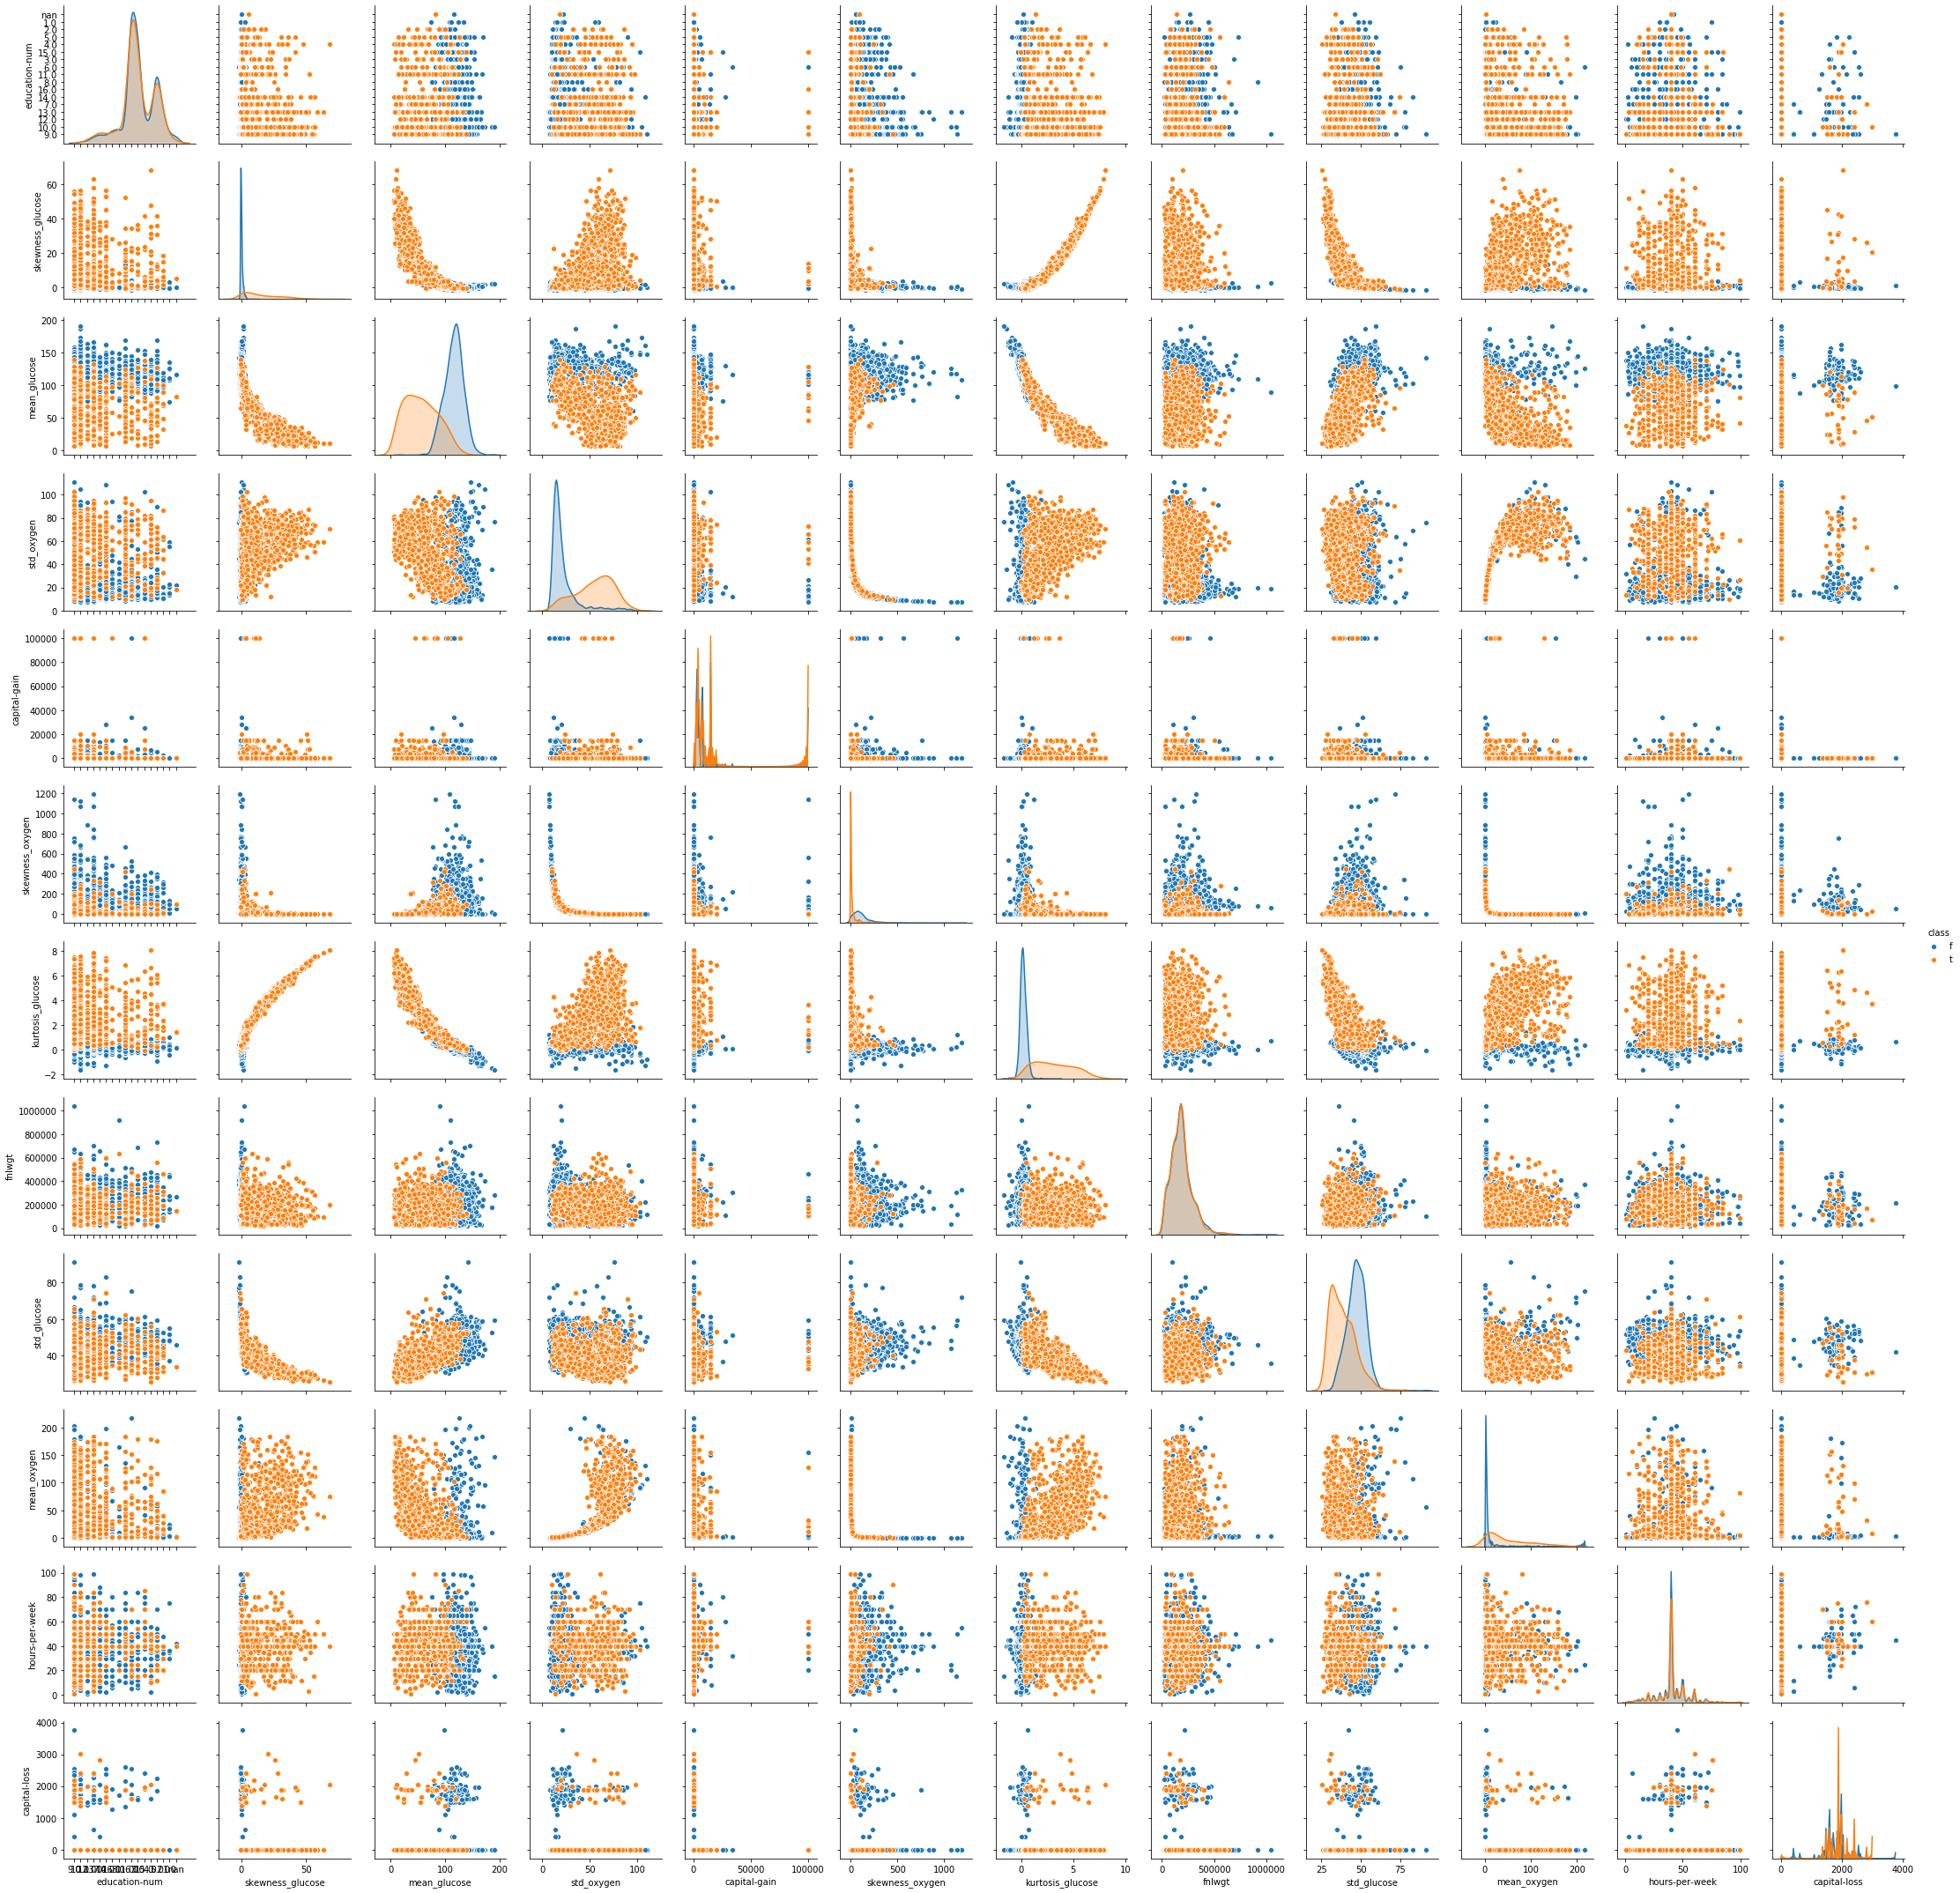

In [164]:
dataO = dataO.replace({'class': {'0.0': 'f', '1.0': 't'}})
sns.pairplot(dataO.dropna(), hue = 'class')
plt.show()

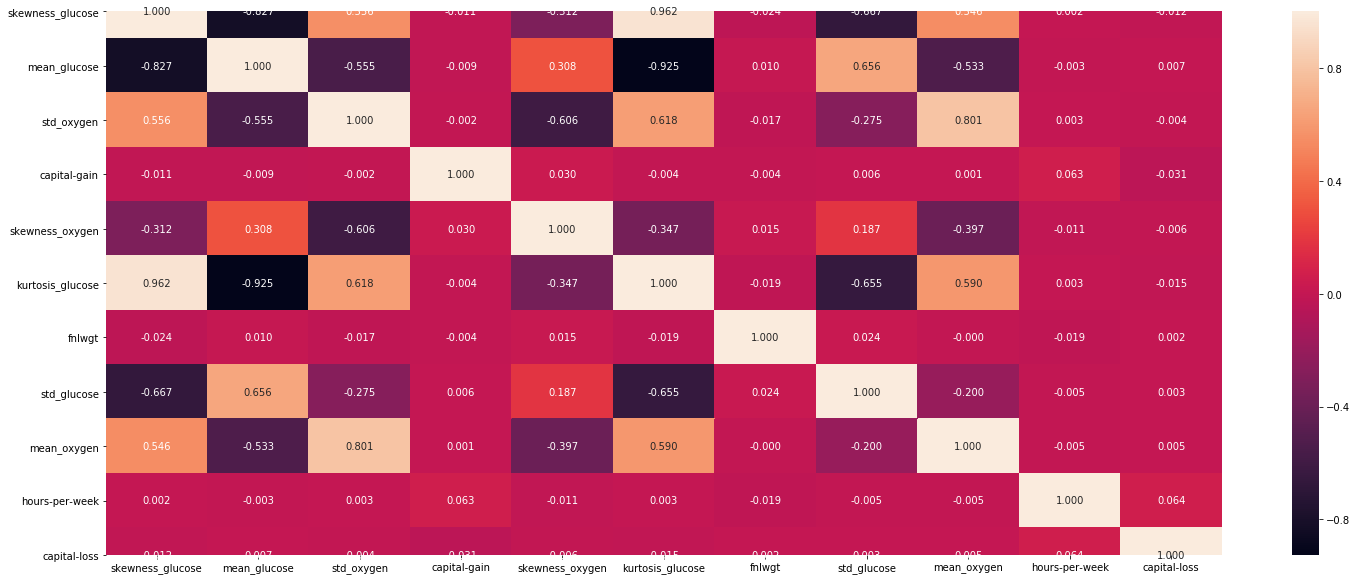

In [174]:
plt.figure(figsize = (25,10))
sns.heatmap(dataO.corr(), annot = True, fmt = '.3f')
plt.show()

Cez heat map sme zistili atribúty, ktoré nesúvisia so žiadnymi s iných a rozhodli sme sa ich preto nevyužívať. Tieto atribúty sú : capital-gain, capital-loss, hours-per-week, fnlwgt.